### About

In this project, I evaluate three different classificaiton machine learning to determine wether an application for credit would be approved. The data set is encrypted meaning that each feature is given nonsensical names, but the data is still valuable for prediction. The types of ML model I evaluate in this project are **Logistic Regression**, **Decision Trees**, and **Random Forests**. I use **standardization** on the data and tune various **hyperparameters** to find the best fit. The hyperparameters considered include the l1 penalty in elastic net regularization (more like LASSO or Ridge Regression) for logistic regression, and the depth of decision trees (also applies to random forests).

 When evaluating best fit, I look at **accuracy**, **f1 score**, **precision**, and **recall** metrics. I use accuracy to determine the best model because it give a good overview of model performance and there is not a very high cost for a misclassification. Since an error with one’s credit approval will not cause great damage to a financial institution, accuracy is a good metric compared to others that are more sensitive to false positives and false negatives. The model that yields the highest accuracy score in my process was the random forests model (max_depth = 6, min_samples_split = 5, n_estimators = 300). This model had a **accuracy score of 0.748** on the test data set.

### Imports

In [3]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import warnings

warnings.filterwarnings("ignore")

## Data Preprocessing

In [4]:
df = pd.read_csv('crx.data') #original data
df.head()

,b,30.83,0,u,g,w,v,1.25,t,t.1,01,f,g.1,00202,0.1,+
0,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
1,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
2,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
3,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
4,b,32.08,4.000,u,g,m,v,2.50,t,f,0,t,g,00360,0,+


In [5]:
np.unique(df['b'].values) #checking for implicit missing values

array(['?', 'a', 'b'], dtype=object)

In [6]:
df = pd.read_csv('crx.data', na_values = ['?']) #Removing implicit missing values
df = df.dropna()

np.unique(df['b'].values)

array(['a', 'b'], dtype=object)

In [7]:
df.dtypes #checking numerical data types are correct

b         object
30.83    float64
0        float64
u         object
g         object
w         object
v         object
1.25     float64
t         object
t.1       object
01         int64
f         object
g.1       object
00202    float64
0.1        int64
+         object
dtype: object

In [8]:
df['+'] = df['+'].apply(lambda x: 1 if x == '+' else 0) #assigning 1's and 0's for target and numerical vars for data
num_vars = ['30.83','0','1.25','01','00202','0.1']
df.data = np.array(df[num_vars])
df.target = np.array(df['+'])

In [9]:
X = df.data #train-test split
y = df.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(521, 6) (521,)
(131, 6) (131,)


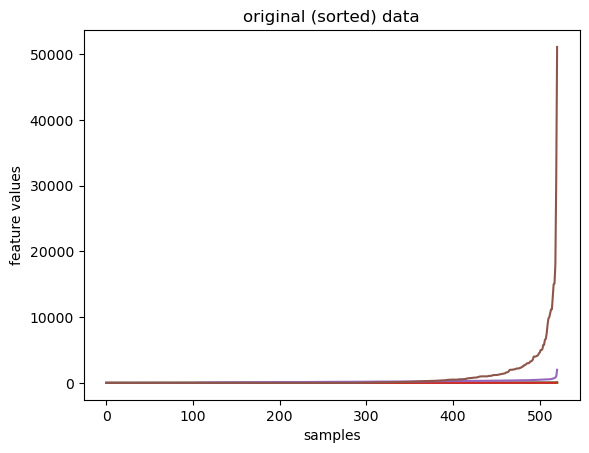

In [10]:
plt.figure() #plotting data prior to standardization
plt.title('original (sorted) data')
plt.xlabel("samples")
plt.ylabel("feature values")
for feature in range(6):
    plt.plot(np.sort(X_train[:,feature]))

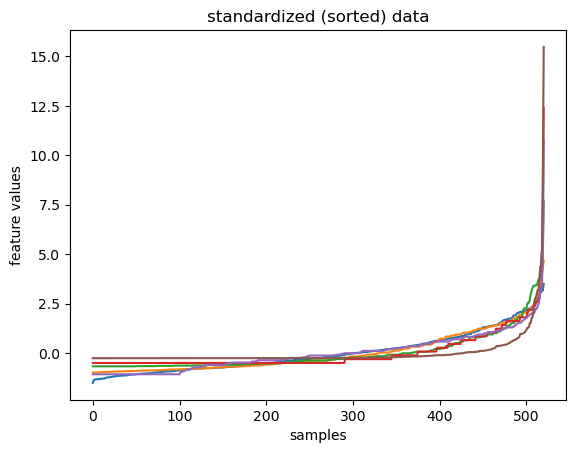

In [11]:
scaler = StandardScaler() #plotting data after standardization
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

plt.figure()
plt.title('standardized (sorted) data')
plt.xlabel("samples")
plt.ylabel("feature values")
for feature in range(6):
    plt.plot(np.sort(X_train[:,feature]))

## Model Selection and Implementation

#### Logistic Regression

In [12]:
logmod = LogisticRegression() #hypertuning parameters
parameters = {'l1_ratio':[0, 0.5, 1], 'C':[0.1, 0.2, 1.0], 'penalty':['elasticnet'], 'solver':['saga']}
gscv = GridSearchCV(logmod, param_grid = parameters)
gscv.fit(X_train, y_train)
gscv.best_params_ , gscv.cv_results_['mean_test_score']

({'C': 0.2, 'l1_ratio': 1, 'penalty': 'elasticnet', 'solver': 'saga'},
 array([0.75805861, 0.75998168, 0.76959707, 0.76      , 0.76576923,
        0.76961538, 0.76001832, 0.76001832, 0.76001832]))

In [13]:
logmod = gscv.best_estimator_ #checking accuracy score
logmod.fit(X_train, y_train)
y_pred = logmod.predict(X_test)
print('accuracy:', accuracy_score(y_test, y_pred))

accuracy: 0.7404580152671756


In [14]:
logmod.coef_ #checking slopes of logistic regression model

array([[0.02776972, 0.20245634, 0.60575961, 1.37917499, 0.        ,
        0.95827253]])

In [15]:
num_vars #checking the columns to interpret slopes

['30.83', '0', '1.25', '01', '00202', '0.1']

#### Decision Tree

In [16]:
dtree = DecisionTreeClassifier(random_state = 0) #tuning hyper parameters
parameters = {'max_depth':[2,3,4,5,6,None],  'min_samples_split':[2,3,5,10]}
gscv = GridSearchCV(dtree, param_grid = parameters)
gscv.fit(X_train, y_train)
gscv.best_params_ , gscv.cv_results_['mean_test_score']

({'max_depth': 4, 'min_samples_split': 5},
 array([0.75809524, 0.75809524, 0.75809524, 0.75809524, 0.77923077,
        0.77923077, 0.77923077, 0.77730769, 0.77728938, 0.77728938,
        0.78113553, 0.77921245, 0.77346154, 0.77346154, 0.77153846,
        0.7753663 , 0.75620879, 0.75620879, 0.75620879, 0.76957875,
        0.71205128, 0.70047619, 0.72357143, 0.73498168]))

In [17]:
dtree = gscv.best_estimator_ #checking accuracy score
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)
print('accuracy:', accuracy_score(y_test, y_pred))

accuracy: 0.732824427480916


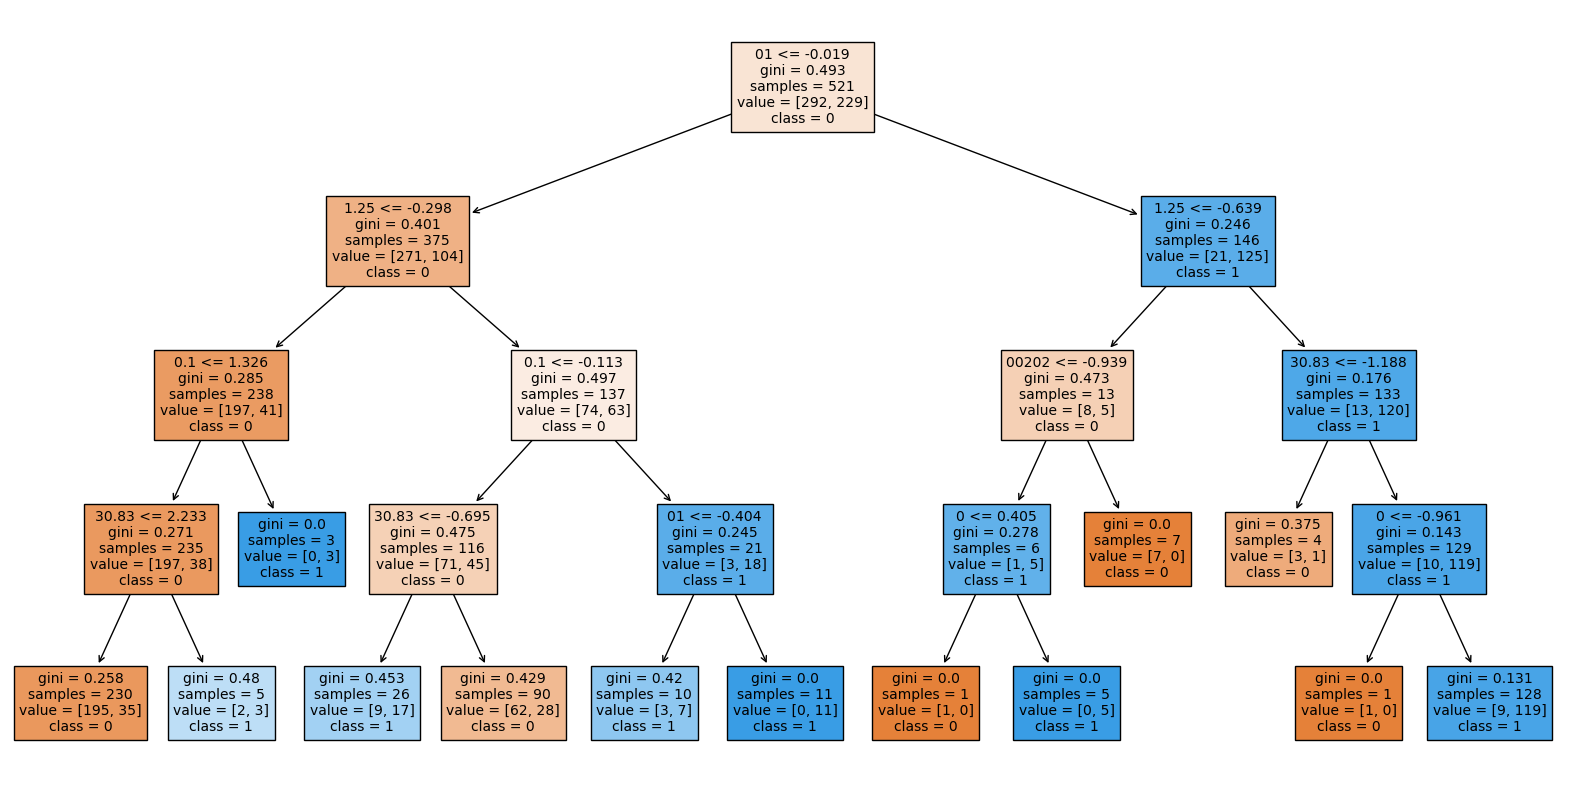

In [18]:
from sklearn import tree #plotting tree
plt.figure(figsize=(20,10))
tree.plot_tree(decision_tree=dtree, feature_names=['30.83','0','1.25','01','00202','0.1'], class_names=['0','1'] , filled=True, fontsize=10)
plt.show()

#### Random Forests

In [19]:
rforest = RandomForestClassifier(random_state = 0) #tuning hyper parameters
parameters = {'max_depth':[2,4,6,None], 'min_samples_split':[2,3,5,10], 'n_estimators': [100,200,300]}
gscv = GridSearchCV(rforest, param_grid = parameters)
gscv.fit(X_train, y_train) 
gscv.best_params_ , gscv.cv_results_['mean_test_score']

({'max_depth': 6, 'min_samples_split': 5, 'n_estimators': 300},
 array([0.78304029, 0.78305861, 0.78882784, 0.78304029, 0.78305861,
        0.78882784, 0.78304029, 0.78305861, 0.78882784, 0.78304029,
        0.78305861, 0.78882784, 0.78492674, 0.79452381, 0.79260073,
        0.78302198, 0.79261905, 0.79069597, 0.7810989 , 0.79261905,
        0.79261905, 0.7810989 , 0.79067766, 0.79641026, 0.80032967,
        0.80225275, 0.80223443, 0.79838828, 0.80221612, 0.80413919,
        0.79071429, 0.80027473, 0.80985348, 0.80796703, 0.79836996,
        0.8021978 , 0.79644689, 0.79071429, 0.79454212, 0.79838828,
        0.79838828, 0.7964652 , 0.79258242, 0.79260073, 0.80031136,
        0.79644689, 0.80221612, 0.80032967]))

In [20]:
rforest = gscv.best_estimator_ #checking accuracy score
rforest.fit(X_train, y_train)
y_pred = rforest.predict(X_test)
print('accuracy:', accuracy_score(y_test, y_pred))

accuracy: 0.7480916030534351


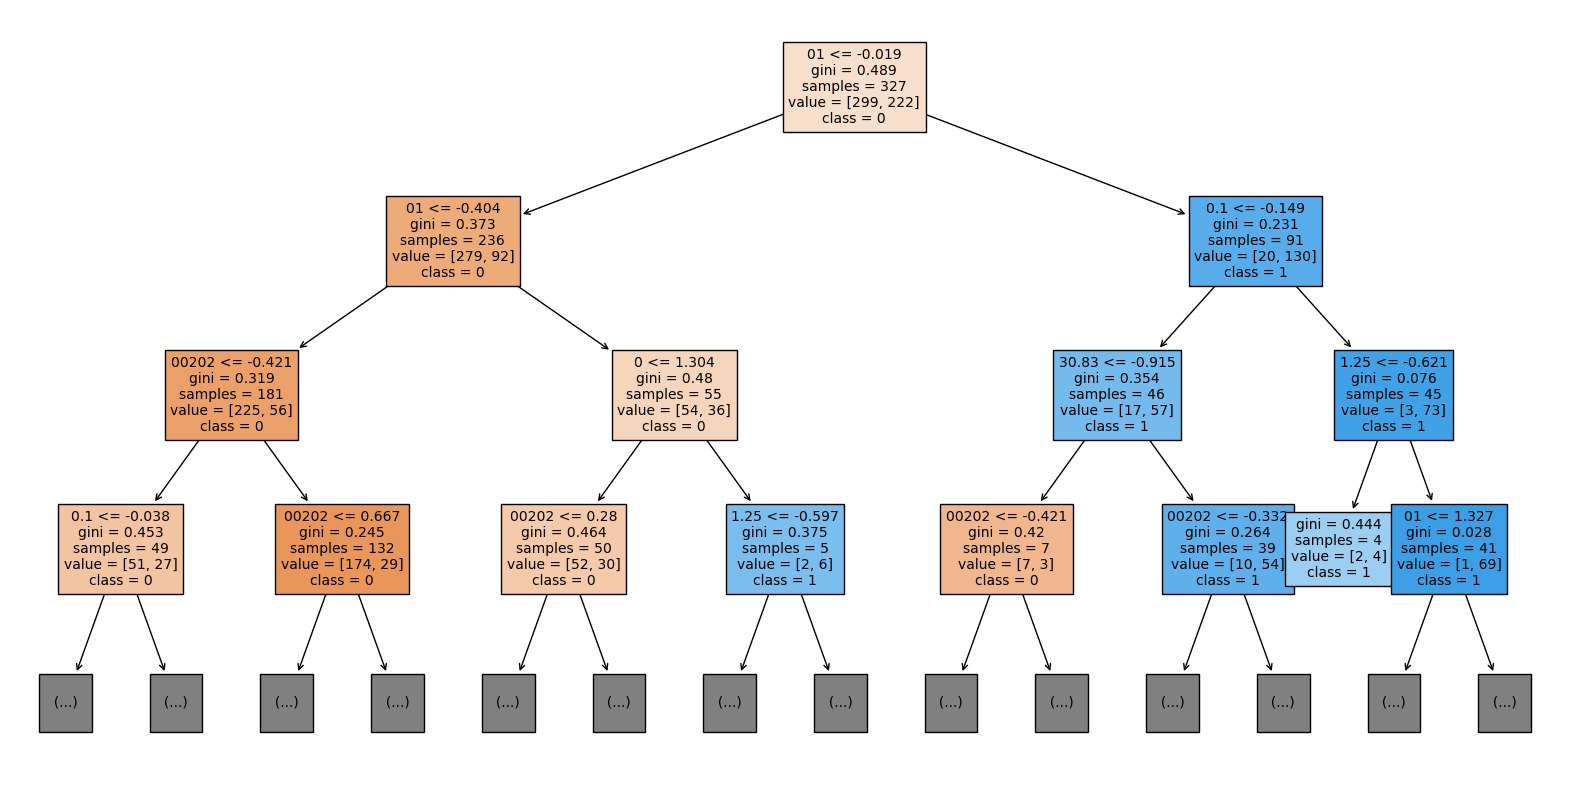

In [21]:
from sklearn import tree #checking different trees in the forest, here I sample the 23rd tree
plt.figure(figsize=(20,10))
tree.plot_tree(decision_tree = rforest.estimators_[22], max_depth=3, feature_names=['30.83','0','1.25','01','00202','0.1'], class_names=['0','1'] , filled=True, fontsize=10)
plt.show()

### Best Model

In [22]:
bestmod = rforest #checking more metrics for best model which is random forests based on accuracy scores
bestmod.fit(X_train, y_train)
y_pred = rforest.predict(X_test)
print('accuracy:', accuracy_score(y_test, y_pred),'precision:', precision_score(y_test, y_pred), 'f1:', f1_score(y_test, y_pred), 'recall:', recall_score(y_test, y_pred))

accuracy: 0.7480916030534351 precision: 0.8367346938775511 f1: 0.7130434782608696 recall: 0.6212121212121212


In [23]:
logmod.fit(X_train, y_train) #checking more metrics for logistic regression model
y_pred = logmod.predict(X_test)
print('accuracy:', accuracy_score(y_test, y_pred),'precision:', precision_score(y_test, y_pred), 'f1:', f1_score(y_test, y_pred), 'recall:', recall_score(y_test, y_pred))

accuracy: 0.7404580152671756 precision: 0.9444444444444444 f1: 0.6666666666666666 recall: 0.5151515151515151


In [24]:
dtree.fit(X_train, y_train) #checking more metrics for decision tree model
y_pred = dtree.predict(X_test)
print('accuracy:', accuracy_score(y_test, y_pred),'precision:', precision_score(y_test, y_pred), 'f1:', f1_score(y_test, y_pred), 'recall:', recall_score(y_test, y_pred))

accuracy: 0.732824427480916 precision: 0.803921568627451 f1: 0.7008547008547008 recall: 0.6212121212121212
